In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [4]:
!unzip "/content/creditcard.csv.zip" -d "/content/"

Archive:  /content/creditcard.csv.zip
replace /content/creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [5]:
df = pd.read_csv("/content/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df.drop(columns=["Time"], inplace=True, errors='ignore')

In [7]:
df = df.sample(n=100000, random_state=42)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 43428 to 182830
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      100000 non-null  float64
 1   V2      100000 non-null  float64
 2   V3      100000 non-null  float64
 3   V4      100000 non-null  float64
 4   V5      100000 non-null  float64
 5   V6      100000 non-null  float64
 6   V7      100000 non-null  float64
 7   V8      100000 non-null  float64
 8   V9      100000 non-null  float64
 9   V10     100000 non-null  float64
 10  V11     100000 non-null  float64
 11  V12     100000 non-null  float64
 12  V13     100000 non-null  float64
 13  V14     100000 non-null  float64
 14  V15     100000 non-null  float64
 15  V16     100000 non-null  float64
 16  V17     100000 non-null  float64
 17  V18     100000 non-null  float64
 18  V19     100000 non-null  float64
 19  V20     100000 non-null  float64
 20  V21     100000 non-null  float64
 21  V22     100

In [9]:
df.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [10]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.004299,0.006626,-0.004818,0.001834,-0.000745,0.003529,-0.002296,0.000378,0.001529,0.002122,...,0.000420,0.003159,-0.000003,0.000288,0.002244,-0.001302,0.001118,0.000066,87.512660,0.001610
std,1.951981,1.614859,1.520053,1.413527,1.354348,1.322060,1.215241,1.205201,1.102195,1.096402,...,0.741773,0.726739,0.607756,0.606037,0.519416,0.481886,0.396744,0.330999,233.571526,0.040093
min,-46.855047,-48.060856,-33.680984,-5.600607,-35.182120,-20.869626,-41.506796,-50.420090,-13.434066,-24.403185,...,-22.889347,-8.887017,-32.828995,-2.824849,-8.696627,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,-0.916937,-0.594872,-0.898603,-0.846100,-0.694284,-0.769776,-0.556768,-0.210440,-0.643908,-0.532969,...,-0.227790,-0.540722,-0.163062,-0.354815,-0.316058,-0.327309,-0.070424,-0.052654,5.550000,0.000000
50%,0.027950,0.063784,0.174467,-0.016815,-0.050196,-0.274698,0.036459,0.022517,-0.052607,-0.091910,...,-0.029146,0.009611,-0.012057,0.040647,0.020622,-0.054981,0.001479,0.011041,21.990000,0.000000
75%,1.318413,0.807379,1.024447,0.747819,0.617760,0.407251,0.571135,0.327452,0.596317,0.454967,...,0.187101,0.533448,0.147057,0.439827,0.352107,0.238490,0.090686,0.077822,76.910000,0.000000
max,2.439207,21.467203,9.382558,13.129143,29.016124,21.550496,36.877368,19.168327,15.594995,23.745136,...,27.202839,8.361985,22.083545,3.990646,6.070850,3.463246,9.200883,16.129609,10000.000000,1.000000


In [11]:
df = df.drop_duplicates()

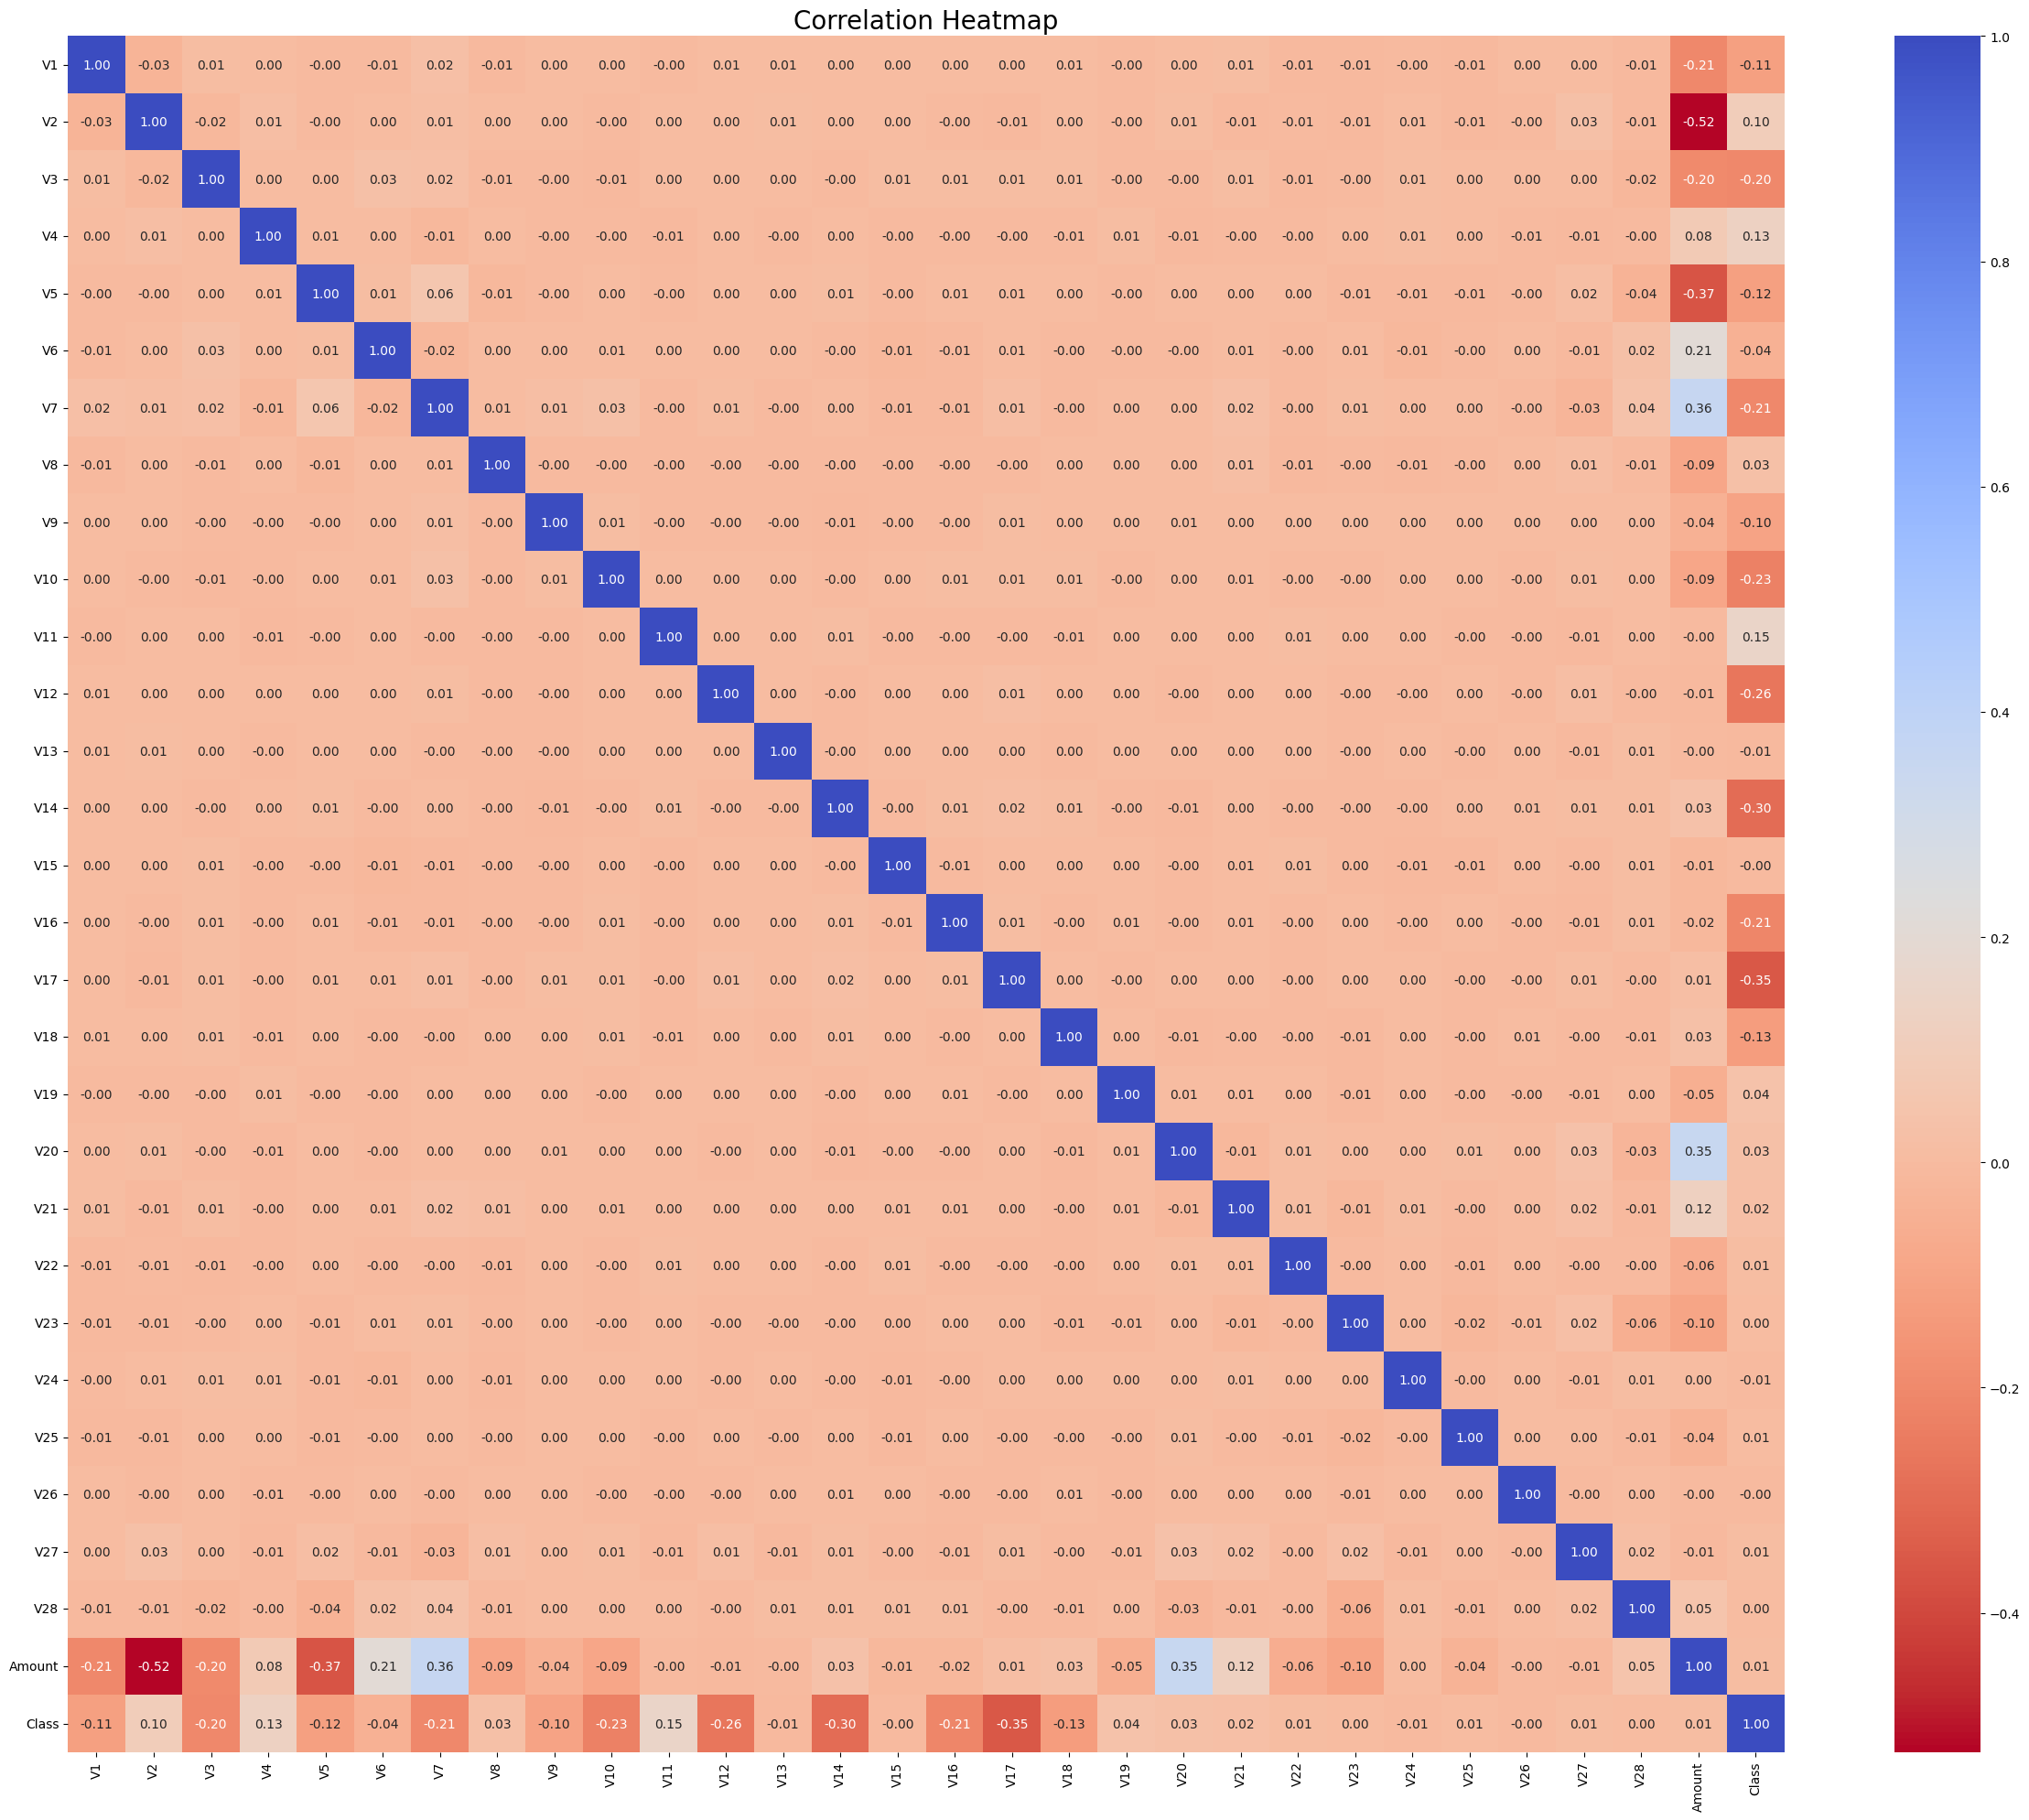

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 20))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap", fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
corr = df.corr()
significant = corr['Class'][abs(corr['Class']) > 0.1].index.tolist()

to_drop = [col for col in [f"V{i}" for i in range(1,29)]
           if col not in significant]
print("Dropping low‑corr features:", to_drop)
X = df.drop(columns=to_drop).copy()
X = X.drop(columns=["Class"])
y = df["Class"]

Dropping low‑corr features: ['V2', 'V6', 'V8', 'V13', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']


In [14]:
X.shape

(98256, 14)

In [15]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [16]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.fit(X_train_scaled, y_train, epochs=10, batch_size=2048, validation_data=(X_test_scaled, y_test))

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7309 - loss: 0.5472 - val_accuracy: 0.9269 - val_loss: 0.2960
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9476 - loss: 0.1553 - val_accuracy: 0.9622 - val_loss: 0.1350
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9626 - loss: 0.0969 - val_accuracy: 0.9758 - val_loss: 0.0749
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9706 - loss: 0.0741 - val_accuracy: 0.9858 - val_loss: 0.0506
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9772 - loss: 0.0579 - val_accuracy: 0.9892 - val_loss: 0.0390
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9827 - loss: 0.0480 - val_accuracy: 0.9907 - val_loss: 0.0299
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9855 - loss: 0.0390 - val_accuracy: 0.9938 - val_loss: 0.0204
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9884 - loss: 0.0321 - val_accuracy: 0.9956 - v

In [21]:
y_probs = model.predict(X_test_scaled)

1840/1840 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [22]:
y_pred_05 = (y_probs >= 0.5).astype(int)
print("\nDefault threshold (0.5):")
print(classification_report(y_test, y_pred_05))


Default threshold (0.5):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     29430
           1       0.99      1.00      1.00     29430

    accuracy                           1.00     58860
   macro avg       1.00      1.00      1.00     58860
weighted avg       1.00      1.00      1.00     58860

